# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("С целью обеспечить воспроизводимость результатов. Фиксирование seed позволяет инициализировать генератор псевдослучайных чисел, поэтому при каждом новом запуске кода будет получаться один и тот же результат.")


С целью обеспечить воспроизводимость результатов. Фиксирование seed позволяет инициализировать генератор псевдослучайных чисел, поэтому при каждом новом запуске кода будет получаться один и тот же результат.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [108]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [7]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [8]:
pd.concat([df_test[:5], df_test[-5:]])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_train[df_train.select_dtypes('object').columns].describe()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [10]:
df_test[df_test.select_dtypes('object').columns].describe()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [11]:
# числовые столбцы df_train
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
# числовые столбцы df_test
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [13]:
# все сразу
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [14]:
# все сразу
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [15]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [16]:
# или с количеством пропусков
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [17]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [18]:
# количество пропусков по столбцам
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Обнаружены пропуски и в трейне, и в тесте в столбцах **mileage, engine, max_power, torque, seats**.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [19]:
# количество объектов с повторяющимися значениями без учета повторений целевой переменной
df_train.duplicated(df_train.loc[:, df_train.columns != 'selling_price']).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [86]:
df_train[df_train.duplicated(df_train.loc[:, df_train.columns != 'selling_price'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [109]:
df_train = df_train.drop_duplicates(
    df_train.loc[:, df_train.columns != 'selling_price'], 
    keep='first', 
    ignore_index=True
)

In [88]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [24]:
# с помощью ignore_index=True индексы уже идут от 0 без пропусков
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [25]:
df_train.index

RangeIndex(start=0, stop=5840, step=1)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [110]:
def str_column_to_float(df, name_col: str):
    data = df.loc[:, name_col].copy()
    for i in range(len(df)):
        if  data[i] != None:
            data[i] = re.sub('[^0-9\.]','', str(df[name_col][i]))
            if len(data[i]) == 0:
                data[i] = None
            else:
                data[i] = float(data[i])
    return data

In [111]:
# привожу столбец mileage к float, удаляя единицы измерения
df_train['mileage'] = str_column_to_float(df_train, 'mileage')
df_test['mileage'] = str_column_to_float(df_test, 'mileage')

In [112]:
# привожу столбец engine к float, удаляя единицы измерения
df_train['engine'] = str_column_to_float(df_train, 'engine')
df_test['engine'] = str_column_to_float(df_test, 'engine')

In [113]:
# привожу столбец max_power к float, удаляя единицы измерения
df_train['max_power'] = str_column_to_float(df_train, 'max_power')
df_test['max_power'] = str_column_to_float(df_test, 'max_power')

In [114]:
# удаляю torque
df_train.drop(['torque'], axis= 1, inplace= True)
df_test.drop(['torque'], axis= 1, inplace= True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [100]:
df_train[['mileage','engine','max_power','seats']].median()

mileage       19.37
engine       1248.0
max_power     81.86
seats           5.0
dtype: object

In [115]:
def fillnan_values(data_train, data_test, name_col):
    median = data_train[name_col].median()
    data_test[name_col].fillna(median, inplace=True)
    data_train[name_col].fillna(median, inplace=True)

In [116]:
fillnan_values(df_train, df_test, 'mileage')
fillnan_values(df_train, df_test, 'engine')
fillnan_values(df_train, df_test, 'max_power')
fillnan_values(df_train, df_test, 'seats')

In [724]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [725]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [37]:
sorted(df_train["seats"].unique())

[2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 14.0]

In [38]:
sorted(df_test["seats"].unique())

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [39]:
print("Значение 'seats' - дискретно, нецелого числа сидений не может быть, при этом 'seats' может принимать конечное число возможных значений,\nсоответствующее количеству мест в машине, а значит ее можно перевести в категориальный тип.") 

Значение 'seats' - дискретно, нецелого числа сидений не может быть, при этом 'seats' может принимать конечное число возможных значений,
соответствующее количеству мест в машине, а значит ее можно перевести в категориальный тип.


In [117]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [41]:
num_features_train = df_train[df_train.select_dtypes(include = ['int64', 'float64']).columns]

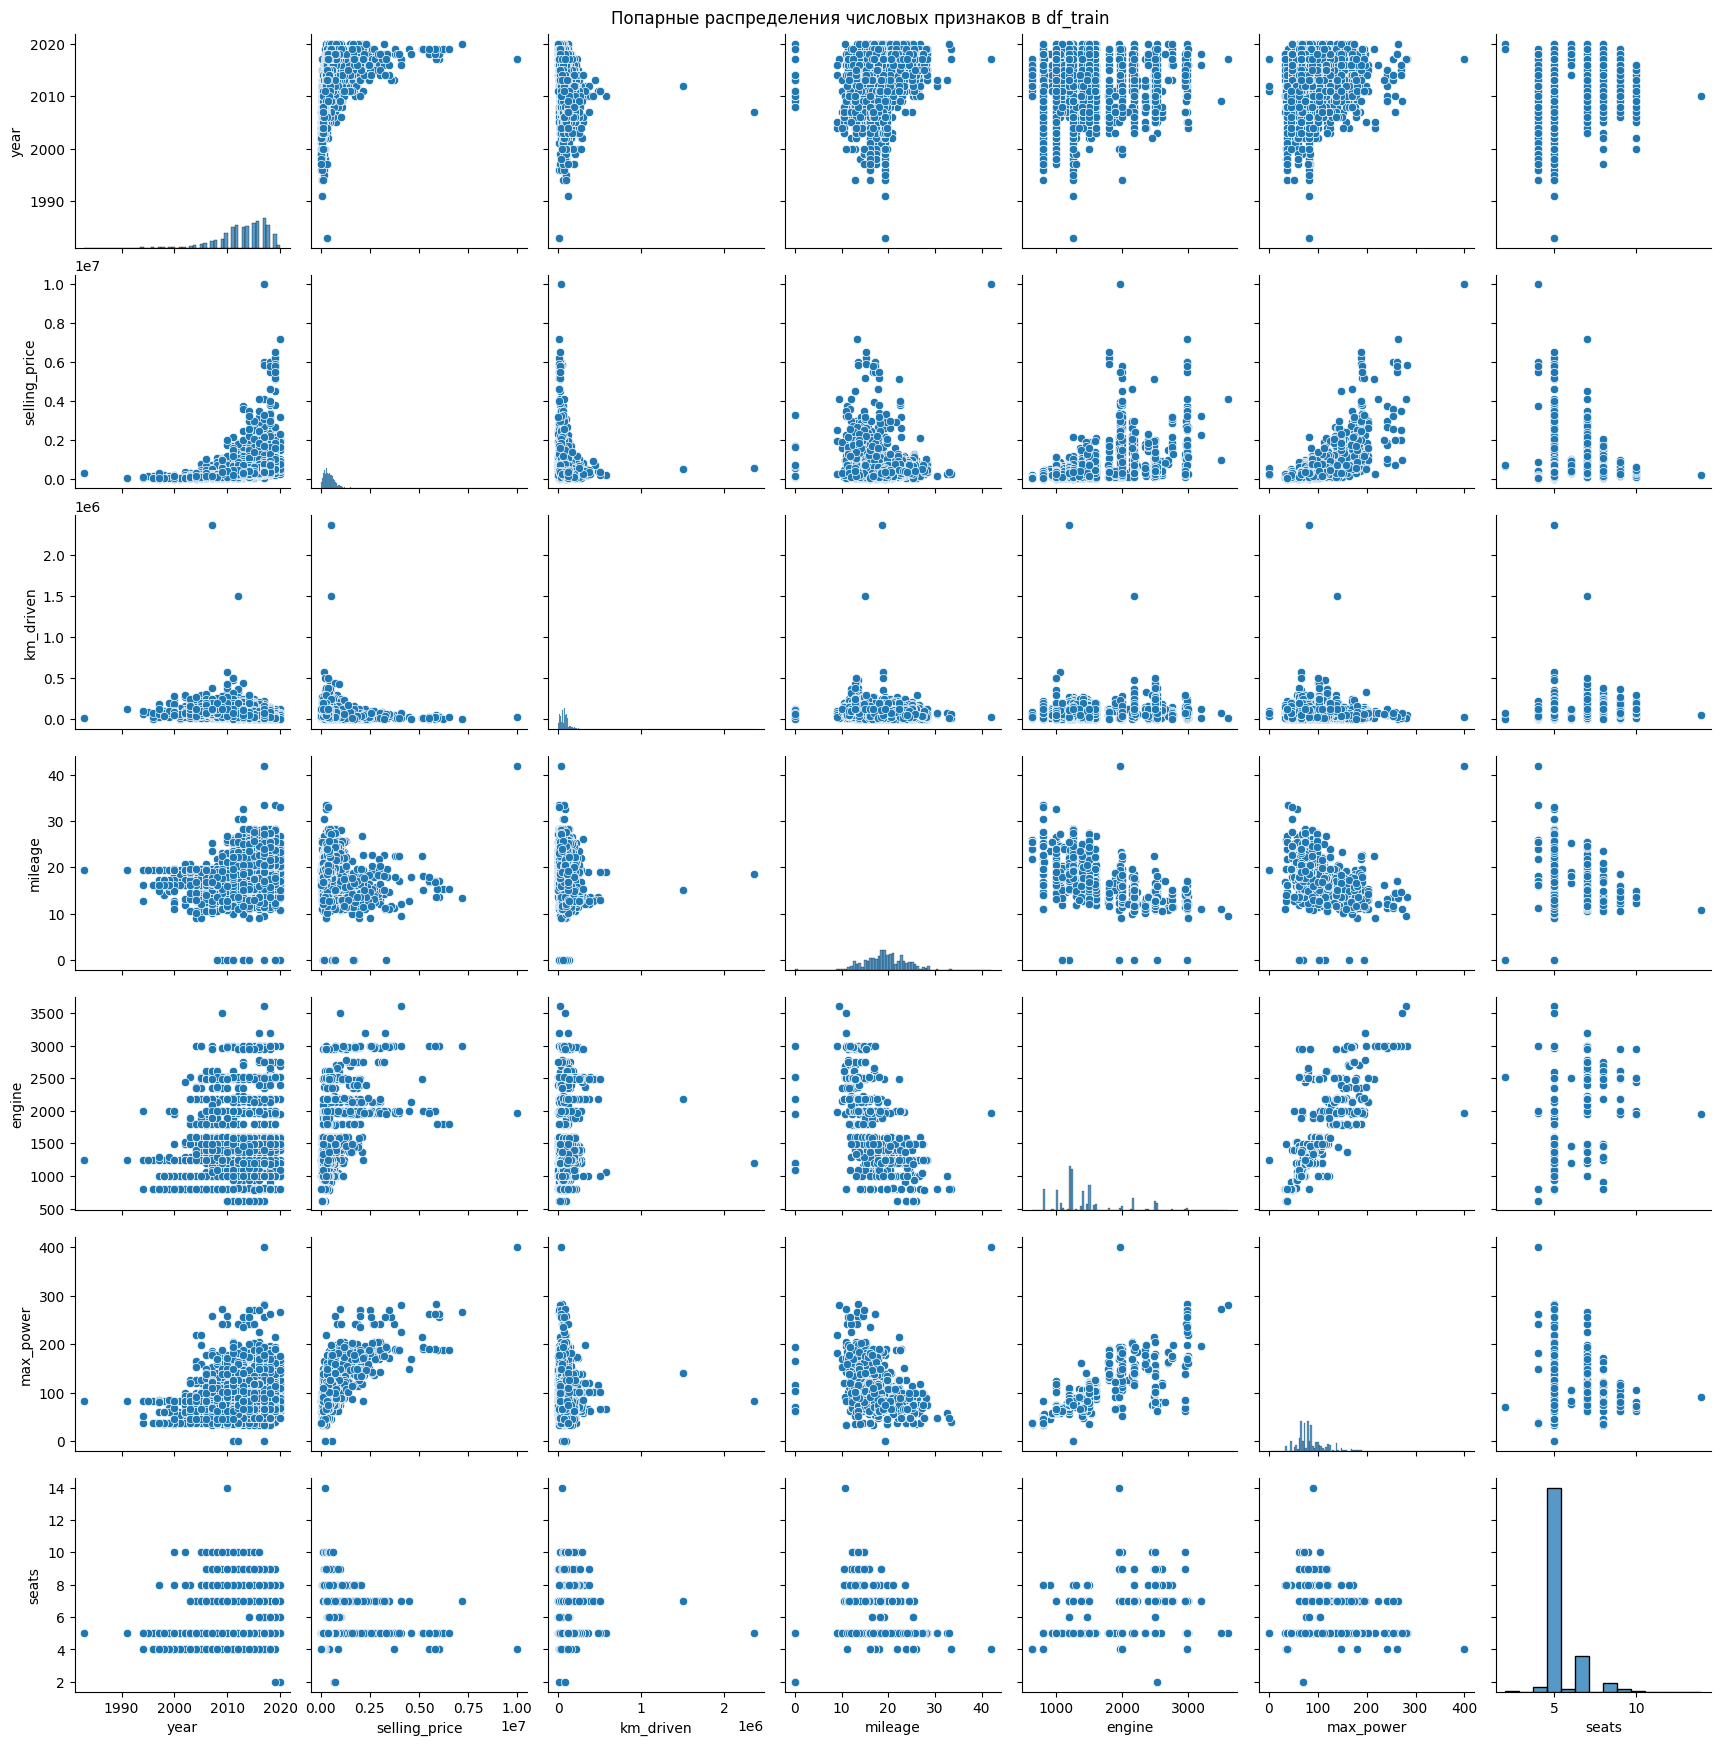

In [468]:
sns.pairplot(num_features_train)
plt.suptitle("Попарные распределения числовых признаков в df_train", y=1)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?

Ответ: Визуально заметна зависимость признаков year, km_driven, max_power и engine с целевой переменной.
* Стоимость растет при увеличении года выпуска машины: новые машины дороже старых, при этом среди свежих машин встречаются как дешевые, так и дорогие.
* Стоимость в зависимости от пробега снижается: чем меньше пробег, тем дороже стоит машина, при этом бывают машины с маленьким пробегом и низкой стоимостью.
* Стоимость растет с увеличением мощности.
  
Также прослеживается некоторые зависимости между признаками. Например, engine и max_power: при росте объема двигателя растет мощность. 

* А о корреляциях признаков? </font>

In [410]:
num_features_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


Ответ:
У целевой переменной (**selling_price**) есть существенная связь с признаками **max_power** (0.69), **engine** (0.45), **year** (0.43).

Также существует взаимосвязь между признаками:

пробег и год (**km_driven - year**) (-0.37), 

пробег и расход топлива (**km_driven - mileage**) (0.34),

объем двигателя и мощность (**engine - max_power**) (0.68),

объем двигателя и количество пассажирских мест (**engine - seats**) (0.65),

объем двигателя и расход топлива (**engine - mileage**) (-0.57),

расход топлива и год (**mileage - year**) (0.34), 

расход топлива и мощность (**mileage - max_power**) (-0.37), 

расход топлива и количество пассажирских мест (**mileage - seats**) (-0.45).



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

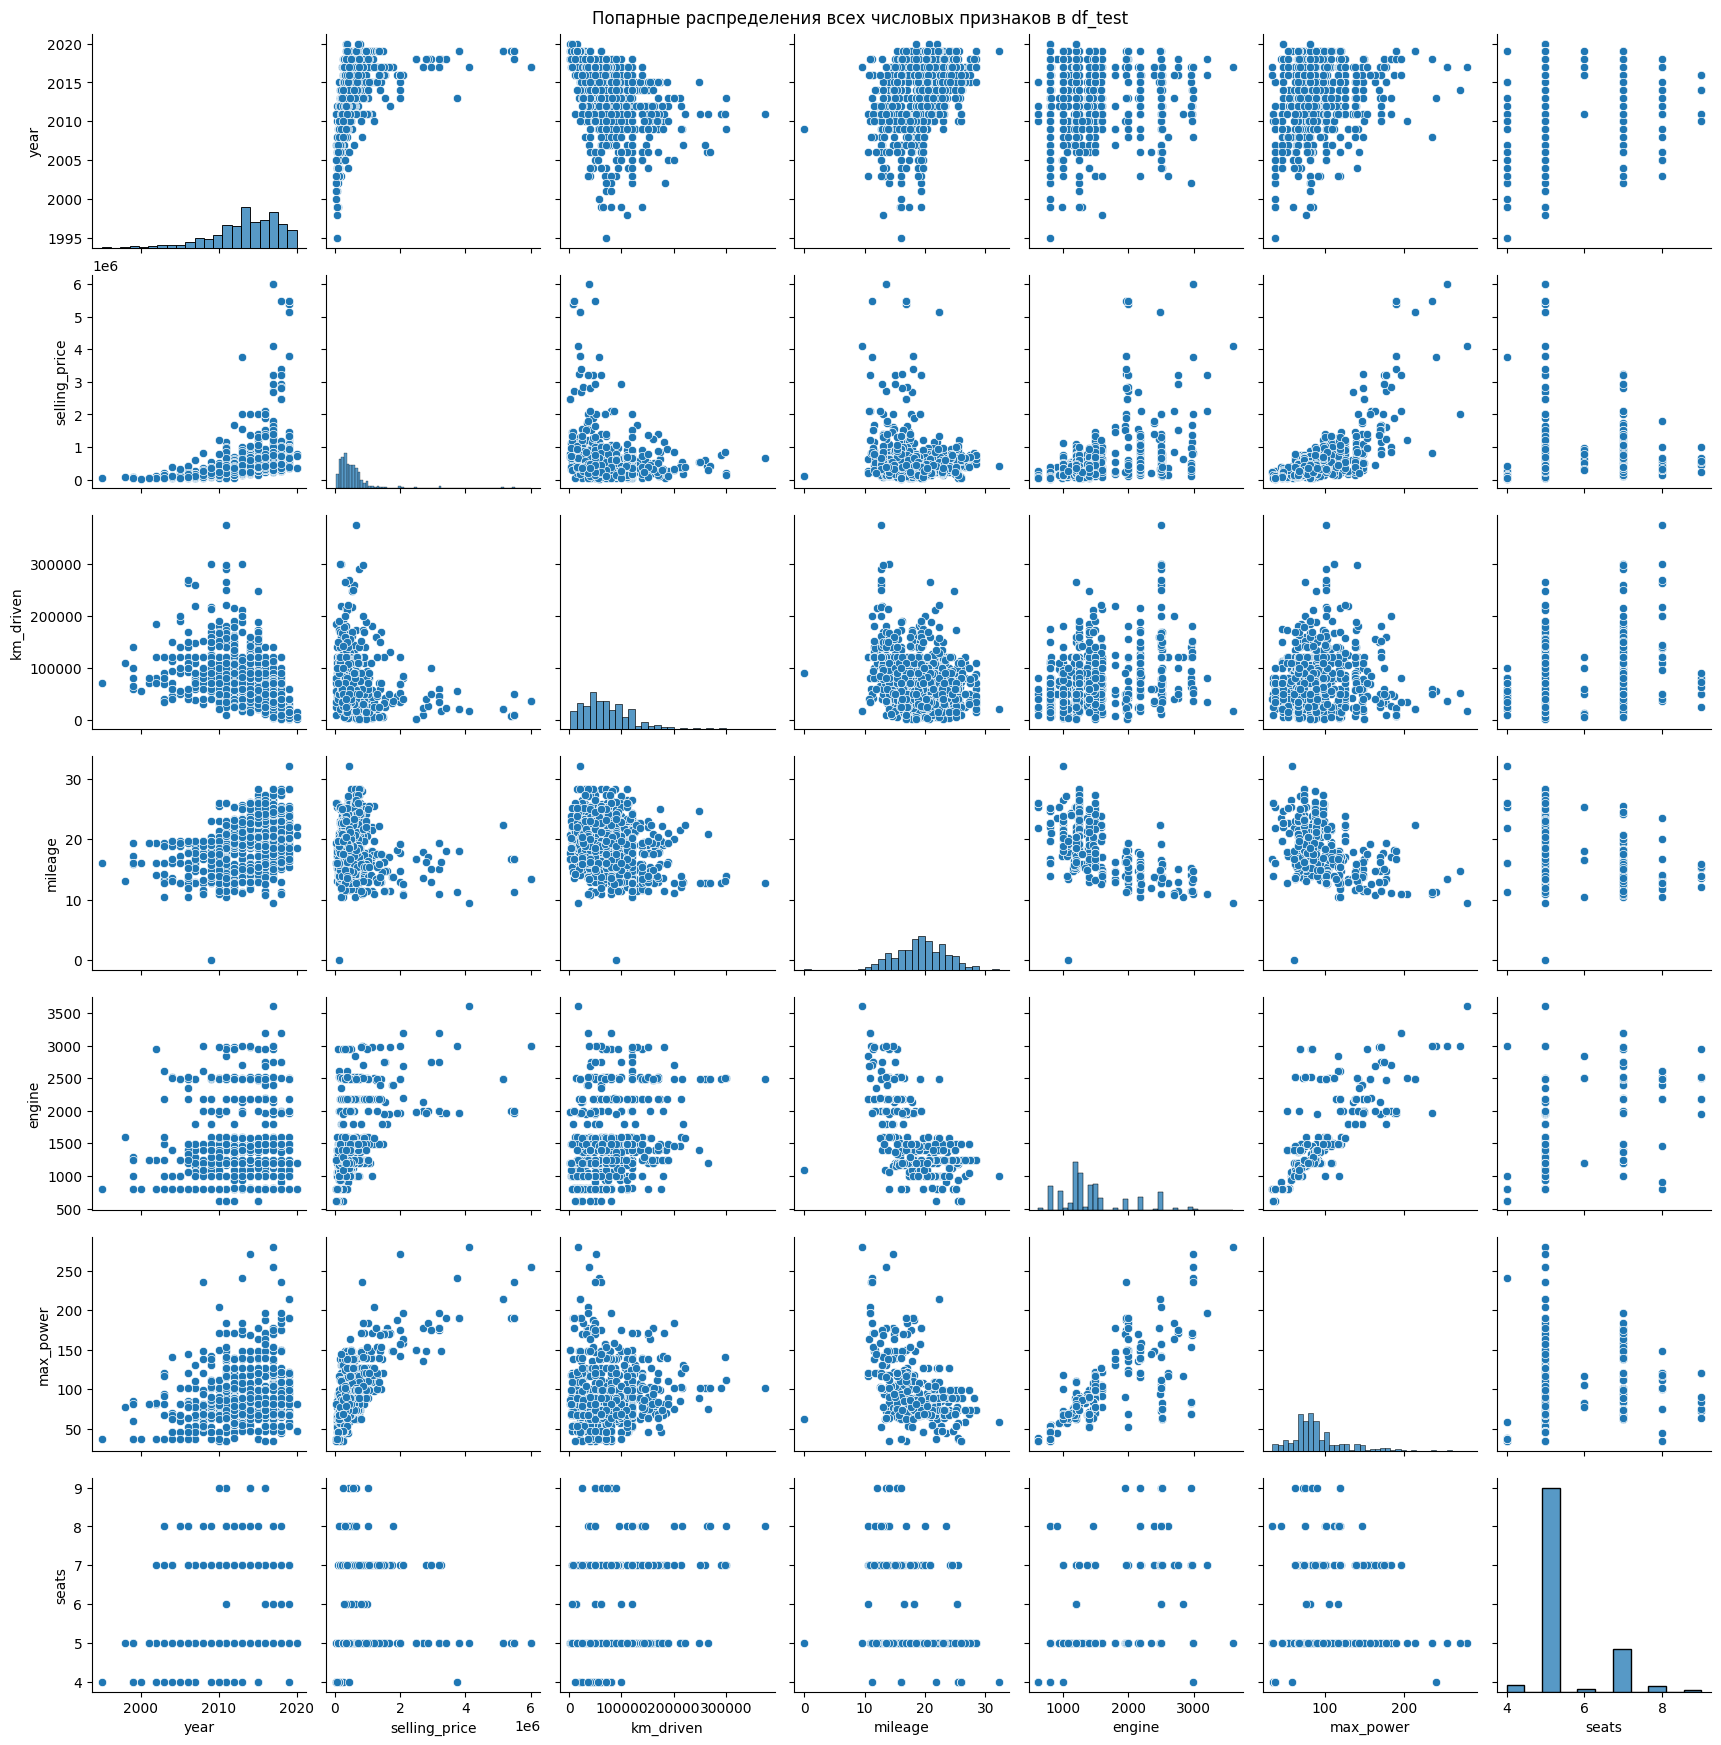

In [469]:
num_features_test = df_test[df_test.select_dtypes(include = ['int64', 'float64']).columns]
sns.pairplot(num_features_test)
plt.suptitle("Попарные распределения всех числовых признаков в df_test", y=1)
plt.show()

Распределение признаков в тестовом датасете очень похоже на распределение признаков в тренировочном датасете. В некоторых признаках тестового датасета заметен меньший разброс в значениях, в отличие от тренировочного, благодаря чему обнаружились новые зависимости: например, пробег от года (**km_driven - year**).

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

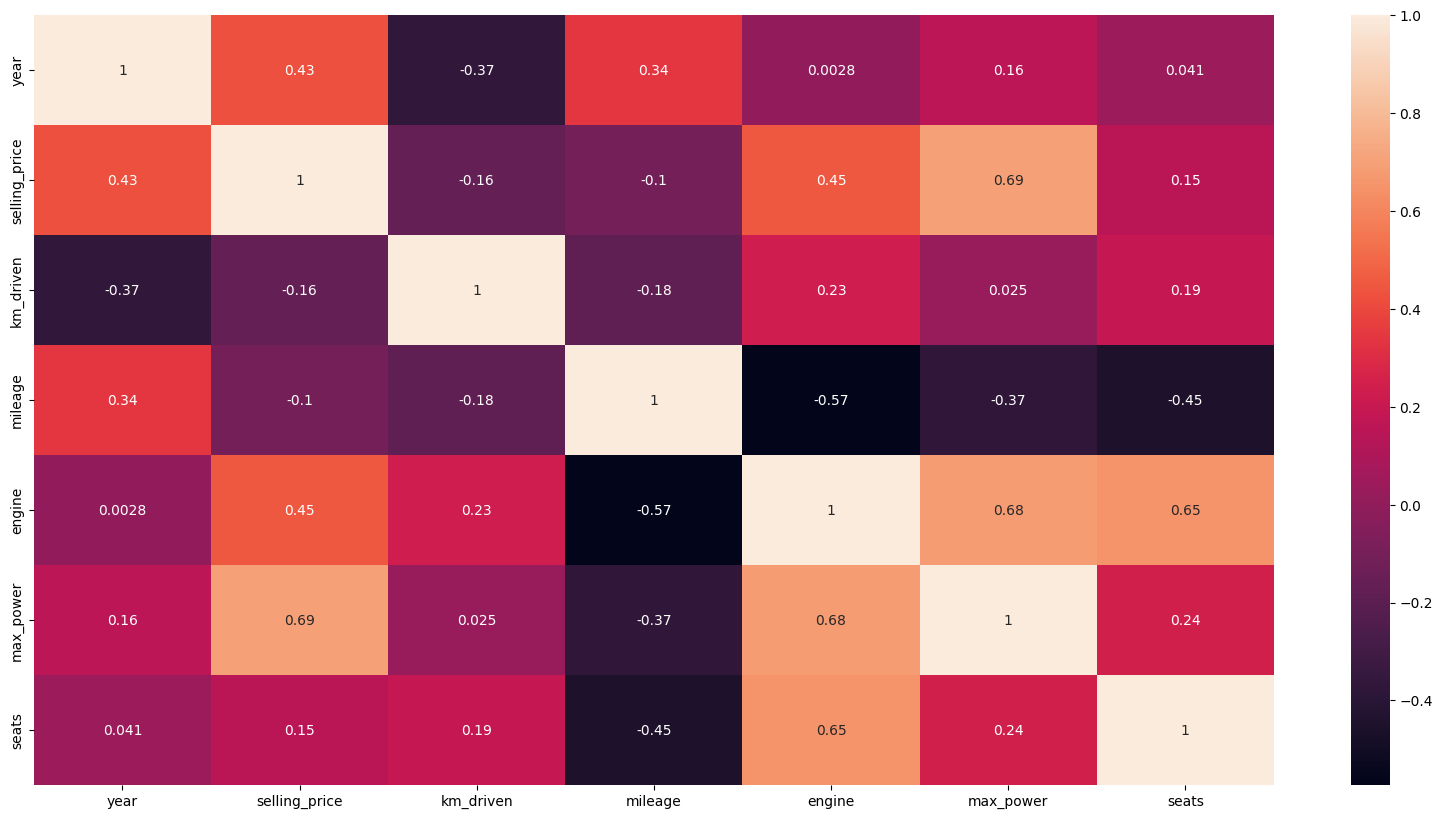

In [412]:
# для большей наглядности построю матрицу корреляций
figure, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(num_features_train.corr(), annot=True, ax=ax);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>

Ответ: 

По модулю наименьшая корреляция между **engine и year** (0.0028); самая отрицательная корреляция между признаками **engine и mileage** (-0.57).


* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>


Ответ: 

- между стоимостью и мощностью автомобиля **selling_price - max_power**(0.69)
- между объемом двигателя и мощностью **engine - max_power** (0.68),
- между объемом двигателя и количеством сидений **engine - seats** (0.65).



* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Ответ: 

Такой вывод можно сделать исходя из графиков в тестовых данных, там закономерность пробега и года выпуска автомобиля хорошо прослеживается. Чем меньше год выпуска, тем, скорее всего, больше километров проехала машина к дате продажи. Корреляция между этими признаками -0.37, поэтому данное утверждение корректно.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

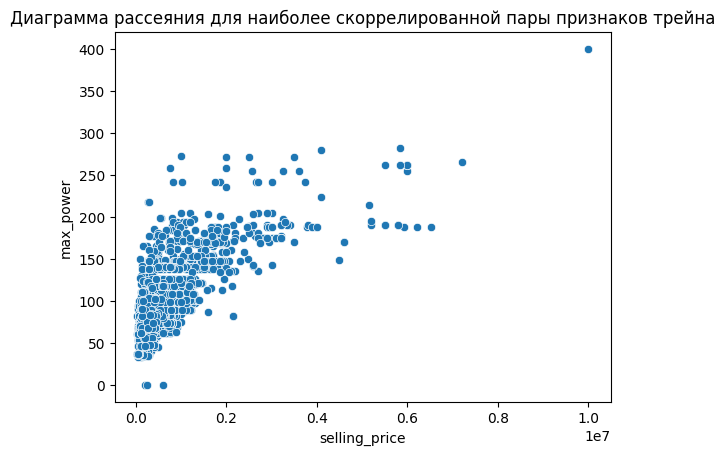

In [471]:
sns.scatterplot(df_train[['max_power', 'selling_price']], x='selling_price', y='max_power')
plt.title("Диаграмма рассеяния для наиболее скоррелированной пары признаков трейна")
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Можно посмотреть, как распределены значения в тренировочном и тестовом датасетах. 

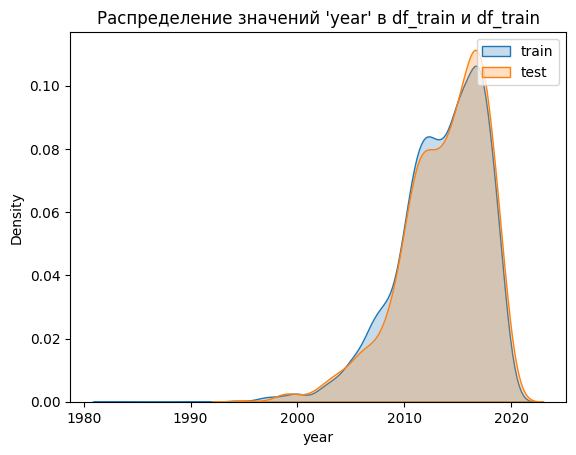

In [436]:
sns.kdeplot(df_train['year'], fill=True, label='train')
sns.kdeplot(df_test['year'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'year' в df_train и df_train")
plt.show()

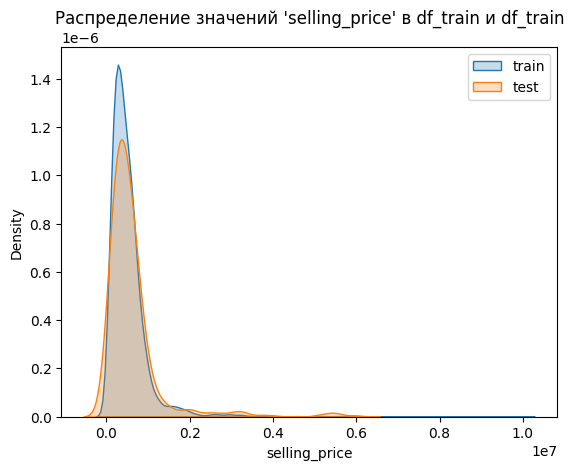

In [435]:
sns.kdeplot(df_train['selling_price'], fill=True, label='train')
sns.kdeplot(df_test['selling_price'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'selling_price' в df_train и df_train")
plt.show()

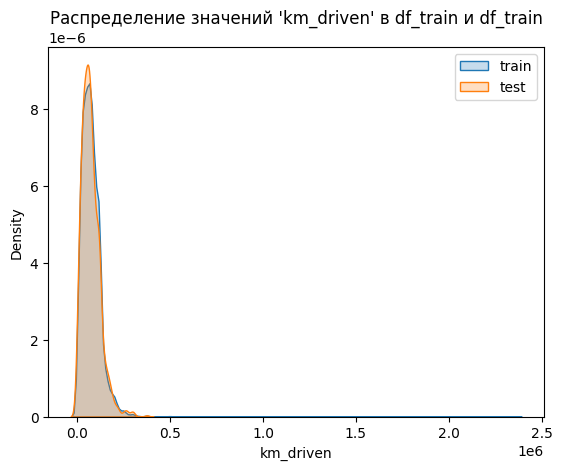

In [434]:
sns.kdeplot(df_train['km_driven'], fill=True, label='train')
sns.kdeplot(df_test['km_driven'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'km_driven' в df_train и df_train")
plt.show()

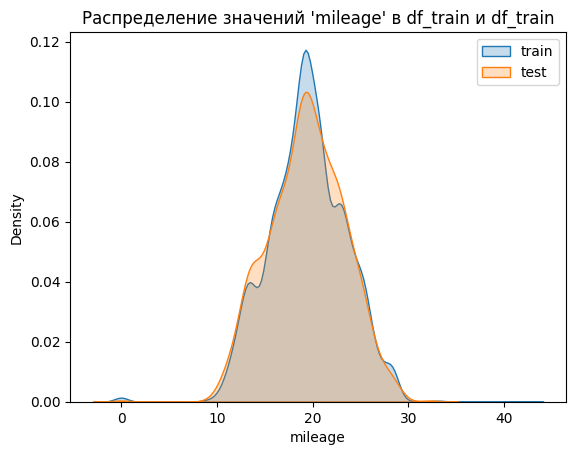

In [433]:
sns.kdeplot(df_train['mileage'], fill=True, label='train')
sns.kdeplot(df_test['mileage'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'mileage' в df_train и df_train")
plt.show()

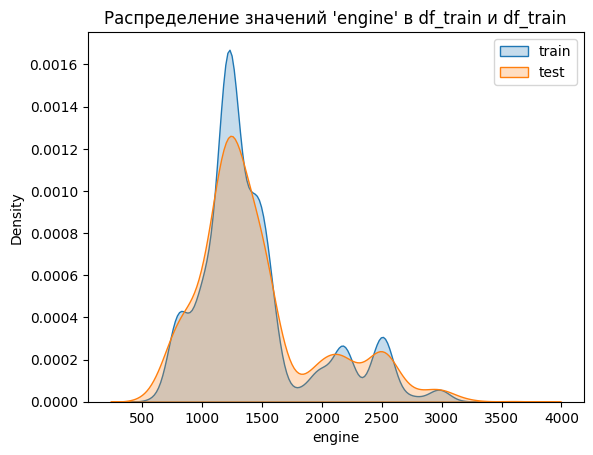

In [432]:
sns.kdeplot(df_train['engine'], fill=True, label='train')
sns.kdeplot(df_test['engine'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'engine' в df_train и df_train")
plt.show()

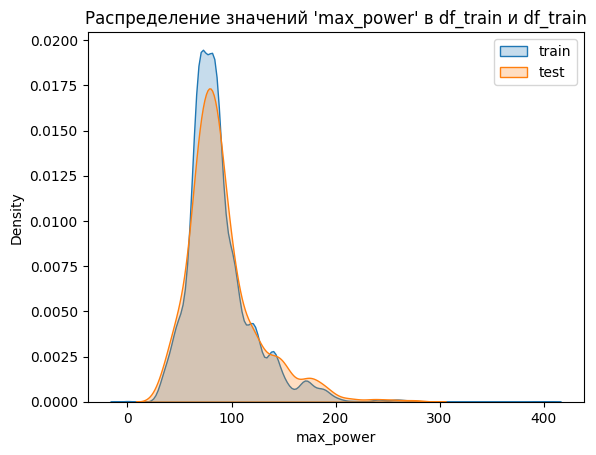

In [430]:
sns.kdeplot(df_train['max_power'], fill=True, label='train')
sns.kdeplot(df_test['max_power'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'max_power' в df_train и df_train")
plt.show()

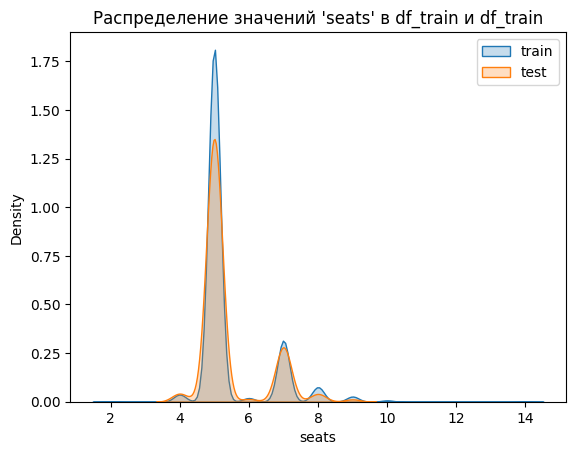

In [431]:
sns.kdeplot(df_train['seats'], fill=True, label='train')
sns.kdeplot(df_test['seats'],  fill=True, label='test')
plt.legend()
plt.title("Распределение значений 'seats' в df_train и df_train")
plt.show()

Распределение плотностей вероятности в тренировочном и тестовом датасете схожи.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [12]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes('number').drop(columns=['selling_price'])

In [13]:
assert X_train.shape == (5840, 6)

In [14]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes('number').drop(columns=['selling_price'])

In [15]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression()

model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

r2_train = r2_score(y_train, pred_train)
MSE_train = MSE(y_train, pred_train)

r2_test = r2_score(y_test, pred_test)
MSE_test = MSE(y_test, pred_test)

print(f'Train.\nMSE = {MSE_train}\nR^2 score = {r2_train}\n')
print(f'Test.\nMSE = {MSE_test}\nR^2 score = {r2_test}\n')

Train.
MSE = 116874153930.02855
R^2 score = 0.5922591702157316

Test.
MSE = 233298779730.45486
R^2 score = 0.5941419794788428



Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

linreg = model.fit(X_train_transformed, y_train)
pred_train = model.predict(X_train_transformed)
pred_test = model.predict(X_test_transformed)

r2_train_transformed = r2_score(y_train, pred_train)
MSE_train_transformed = MSE(y_train, pred_train)

r2_test_transformed = r2_score(y_test, pred_test)
MSE_test_transformed = MSE(y_test, pred_test)

print(f'Train.\nMSE = {MSE_train_transformed}\nR^2 score = {r2_train_transformed}\n')
print(f'Test.\nMSE = {MSE_test_transformed}\nR^2 score = {r2_test_transformed}\n')

Train.
MSE = 116874153930.02892
R^2 score = 0.5922591702157303

Test.
MSE = 233298779730.44965
R^2 score = 0.594141979478852



Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [49]:
dict(zip(X_train.columns, linreg.coef_))

{'year': 152772.57084581413,
 'km_driven': -44158.818520052766,
 'mileage': 28833.925777517274,
 'engine': 61178.494336847565,
 'max_power': 322807.35325923417,
 'seats': -23209.132485997452}

Наиболее информативным оказался признак **max_power**.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [50]:
from sklearn.linear_model import Lasso

model = Lasso()
lasso = model.fit(X_train_transformed, y_train)
pred_train = model.predict(X_train_transformed)
pred_test = model.predict(X_test_transformed)

r2_train_lasso = r2_score(y_train, pred_train)
MSE_train_lasso = MSE(y_train, pred_train)

r2_test_lasso = r2_score(y_test, pred_test)
MSE_test_lasso = MSE(y_test, pred_test)

print(f'Train.\nMSE = {MSE_train_lasso}\nR^2 score = {r2_train_lasso}\n')
print(f'Test.\nMSE = {MSE_test_lasso}\nR^2 score = {r2_test_lasso}\n')

Train.
MSE = 116874153940.1429
R^2 score = 0.5922591701804456

Test.
MSE = 233299450599.16928
R^2 score = 0.5941408124026637



<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [51]:
dict(zip(X_train.columns, lasso.coef_))

{'year': 152772.39021419562,
 'km_driven': -44157.689857942605,
 'mileage': 28832.04339588388,
 'engine': 61173.66240922125,
 'max_power': 322808.23691946967,
 'seats': -23206.25564908013}

L1-регуляризация с параметрами по умолчанию не занулила никакие веса, т.к. в моделе нет неинформативных признаков, все признаки важны.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [254]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(
    estimator=Lasso(),
    param_grid={'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
        'max_iter': [500, 1000, 2500, 5000],     
        'fit_intercept': [True, False],
        'positive': [True, False]},
    scoring='r2',
    n_jobs=-1,
    cv=10,
    verbose=1
).fit(X_train_transformed, y_train)

pred_train = cv.predict(X_train_transformed)
pred_test = cv.predict(X_test_transformed)

r2_train_cv = r2_score(y_train, pred_train)
MSE_train_cv  = MSE(y_train, pred_train)

r2_test_cv = r2_score(y_test, pred_test)
MSE_test_cv = MSE(y_test, pred_test)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [222]:
print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Train.
MSE = 119237084145.24263
R^2 score = 0.584015575765837

Test.
MSE = 244847867401.415
R^2 score = 0.5740506190937749



<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

GridSeachCV перебирает все параметры и с каждым выбранным параметром обучается на 10 фолдах.

10 фолдов * (10 параметров alpha * 4 параметра max_iter * 2 параметра fit_intercept * 2 параметра positive) = 1600 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [255]:
cv.best_params_

{'alpha': 10000.0, 'fit_intercept': True, 'max_iter': 500, 'positive': True}

In [256]:
dict(zip(X_train.columns, cv.best_estimator_.coef_))

{'year': 164667.669394398,
 'km_driven': 0.0,
 'mileage': 5057.50398839333,
 'engine': 4805.566636849791,
 'max_power': 333708.7856031869,
 'seats': 0.0}

Лучший коэффициент регуляризации $\alpha = 10000$. Да, занулились признаки **km_driven** и **seats**.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [262]:
from sklearn.linear_model import ElasticNet

cv = GridSearchCV(
    estimator=ElasticNet(),
    param_grid={
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
        'l1_ratio': np.linspace(0.1, 1, 10),
        'max_iter': [500, 1000, 2500, 5000],
        'positive': [True, False]
    },
    n_jobs=-1,
    scoring='r2',
    cv=10,
    verbose=1
).fit(X_train_transformed, y_train)

pred_train = cv.predict(X_train_transformed)
pred_test = cv.predict(X_test_transformed)

r2_train_cv = r2_score(y_train, pred_train)
MSE_train_cv  = MSE(y_train, pred_train)

r2_test_cv = r2_score(y_test, pred_test)
MSE_test_cv = MSE(y_test, pred_test)

print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
Train.
MSE = 120104483436.44418
R^2 score = 0.5809894652456227

Test.
MSE = 254879256611.59024
R^2 score = 0.5565995215242853



<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [263]:
cv.best_params_

{'alpha': 1.0, 'l1_ratio': 0.9, 'max_iter': 500, 'positive': True}

Гиперпараметры лучшей модели: alpha = 1.0, l1_ratio = 0.9, max_iter = 500.

Занулились признаки km_driven и seats.

In [266]:
dict(zip(X_train.columns, cv.best_estimator_.coef_))

{'year': 158426.95415606184,
 'km_driven': 0.0,
 'mileage': 24801.590884225185,
 'engine': 49270.41837778962,
 'max_power': 292521.1699905324,
 'seats': 0.0}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [118]:
X_train_cat = df_train.drop(columns=["name", "selling_price"])
X_test_cat = df_test.drop(columns=["name", "selling_price"])

In [119]:
assert X_train_cat.shape == (5840, 10)

In [120]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [28]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_columns = list(X_train_cat.select_dtypes('object').columns) + ["seats"]

OH_encoder = OneHotEncoder(drop="first", sparse_output=False).fit(X_train_cat[cat_columns])

X_train_cat = np.concatenate([X_train_cat.drop(columns=cat_columns).to_numpy(),OH_encoder.transform(X_train_cat[cat_columns])], axis=1)
X_test_cat = np.concatenate([X_test_cat.drop(columns=cat_columns).to_numpy(),OH_encoder.transform(X_test_cat[cat_columns])], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [458]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(
    estimator=Ridge(),
    param_grid={
        'alpha': [0.01, 0.1, 1.0, 10.0, 25.0, 50.0, 100.0, 500.0, 1000.0, 10000.0],
        'max_iter': [500, 1000, 2500, 5000],
        'positive': [True, False]
    },
    n_jobs=-1,
    scoring='r2',
    cv=10,
    verbose=1,
).fit(X_train_cat, y_train)

pred_train = cv.predict(X_train_cat)
pred_test = cv.predict(X_test_cat)

r2_train_cv = r2_score(y_train, pred_train)
MSE_train_cv  = MSE(y_train, pred_train)

r2_test_cv = r2_score(y_test, pred_test)
MSE_test_cv = MSE(y_test, pred_test)

print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Train.
MSE = 99239748171.39227
R^2 score = 0.6537806186711668

Test.
MSE = 203677821138.4232
R^2 score = 0.6456720544924834



Да, качество удалось улучшить. Теперь $R^2 \approx 0.6457$.

In [459]:
cv.best_estimator_

Ridge(alpha=10.0, max_iter=500)

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## Новые признаки на основе уже существующих

Для начала построю модель из вещественных признаков, добавив полиномы 3 степени и применив стандартизацию.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Создаем объект PolynomialFeatures, указав степень взаимодействия, равную 3
poly_transformer = PolynomialFeatures(degree = 3)

poly = poly_transformer.fit(X_train)

X_train_p = poly_transformer.transform(X_train)
X_test_p = poly_transformer.transform(X_test)

scaler = StandardScaler().fit(X_train_p)

X_train_scaled = scaler.transform(X_train_p)
X_test_scaled = scaler.transform(X_test_p)

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(
    estimator=Lasso(),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 5000.0, 7500.0, 10000.0, 50000.0],
               'positive': [True, False]
    },  
    scoring='r2',
    n_jobs=-1,
    cv=10
).fit(X_train_scaled, y_train)

pred_train = cv.predict(X_train_scaled)
pred_test = cv.predict(X_test_scaled)

r2_train_cv = r2_score(y_train, pred_train)
MSE_train_cv  = MSE(y_train, pred_train)

r2_test_cv = r2_score(y_test, pred_test)
MSE_test_cv = MSE(y_test, pred_test)

In [632]:
print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Train.
MSE = 77227985484.39934
R^2 score = 0.7305734259875063

Test.
MSE = 158893097521.37152
R^2 score = 0.7235817602260662



In [633]:
cv.best_params_

{'alpha': 10000.0, 'positive': False}

Добавление в модель с вещественными признаками полиномов 3 степени и стандартизация признаков улучшили качество модели с L1-регуляризацией. Теперь $R^2 \approx 0.7236$.

В модель можно добавить категориальные признаки, которые были ранее закодированы с помощью OneHotEncoder.

In [55]:
X_train_poly_cat = np.concatenate([X_train_scaled, X_train_cat], axis=1)
X_test_poly_cat = np.concatenate([X_test_scaled, X_test_cat], axis=1)

In [56]:
cv = GridSearchCV(
    estimator=Lasso(),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 5000.0, 7500.0, 10000.0, 50000.0],
               'positive': [True, False]
    },  
    scoring='r2',
    n_jobs=-1,
    cv=10,
    verbose=1
).fit(X_train_poly_cat, y_train)

pred_train = cv.predict(X_train_poly_cat)
pred_test = cv.predict(X_test_poly_cat)

r2_train_cv = r2_score(y_train, pred_train)
MSE_train_cv  = MSE(y_train, pred_train)

r2_test_cv = r2_score(y_test, pred_test)
MSE_test_cv = MSE(y_test, pred_test)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.435e+14, tolerance: 1.247e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.997e+14, tolerance: 1.564e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+14, tolerance: 1.521e

In [57]:
print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Train.
MSE = 78074672373.93405
R^2 score = 0.727619575171927

Test.
MSE = 162427203345.905
R^2 score = 0.7174336560828958



При добавлении категориальных признаков $R^2$ уменьшился и теперь $R^2 \approx 0.7174$.

## Работа с выбросами
Построю boxplot для каждого столбца и посмотрю на выбросы. При наличии резко выделяющихся значений - удалю их из датасета.

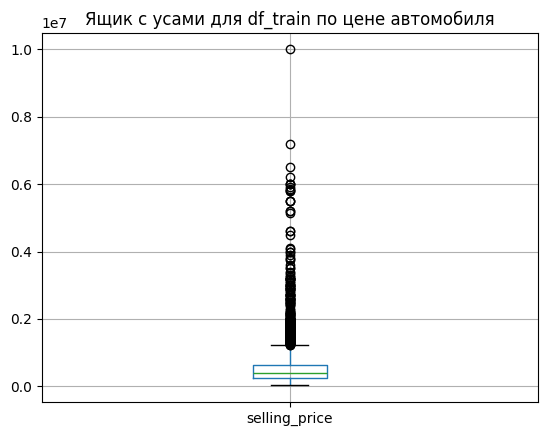

In [737]:
# посмотрю ящики с усами для всех вещественных параметров
df_train[['selling_price']].boxplot()
plt.title('Ящик с усами для df_train по цене автомобиля')
plt.show()

In [58]:
# самая дорогая машина резко выделяется в цене, посмотрим на эту машину
df_train[df_train['selling_price'] > 0.9e07]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0


In [59]:
# удалим эту машину 
df_train = df_train[df_train['selling_price'] < 0.9e07]

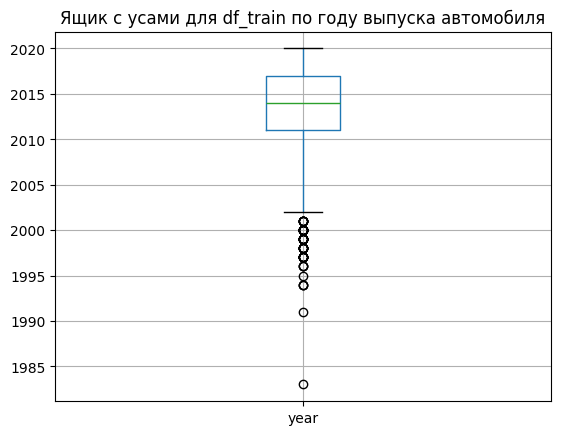

In [60]:
df_train[['year']].boxplot()
plt.title('Ящик с усами для df_train по году выпуска автомобиля')
plt.show()

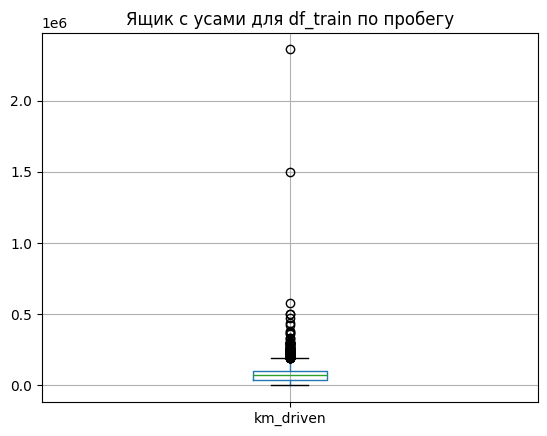

In [61]:
df_train[['km_driven']].boxplot()
plt.title('Ящик с усами для df_train по пробегу')
plt.show()

В km_driven видно два резко выделяющихся значения. Удалим на эти машины. 

In [62]:
df_train[df_train['km_driven']>1000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1397,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1,2179.0,140.00,7.0
2680,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197.0,81.83,5.0


In [63]:
# удалим их
df_train = df_train[df_train['km_driven'] < 1000000]

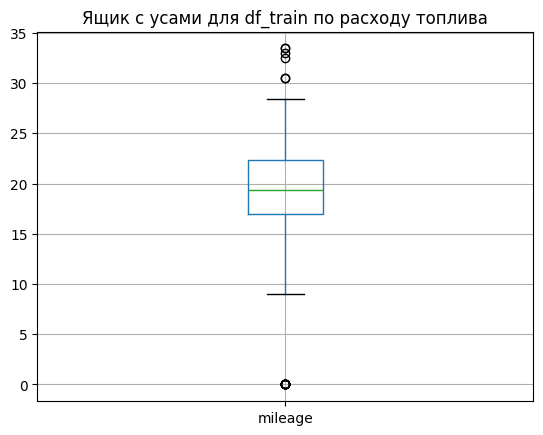

In [64]:
df_train[['mileage']].boxplot()
plt.title('Ящик с усами для df_train по расходу топлива')
plt.show()

Есть нулевые значения в расходе топлива автомобиля в тренировочных данных, удалим их.

In [65]:
df_train = df_train[df_train['mileage']> 0]

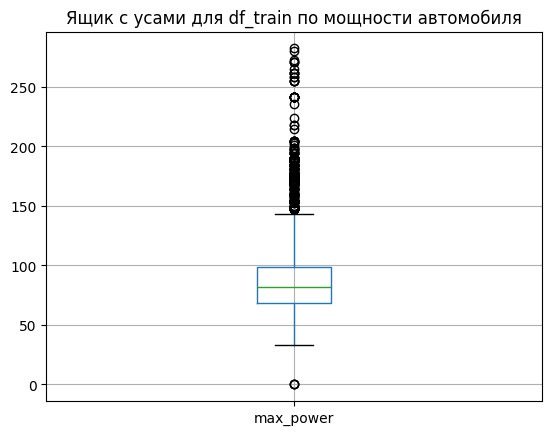

In [66]:
df_train[['max_power']].boxplot()
plt.title('Ящик с усами для df_train по мощности автомобиля')
plt.show()

Есть нулевые значения в мощности автомобиля в тренировочных данных, их всего три штуки и проще всего их просто удалить.

In [67]:
df_train[df_train['max_power']< 10]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
476,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.37,1248.0,0.0,5.0
1112,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,19.37,1248.0,0.0,5.0
2003,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,19.37,1248.0,0.0,5.0


In [68]:
df_train = df_train[df_train['max_power'] > 0]

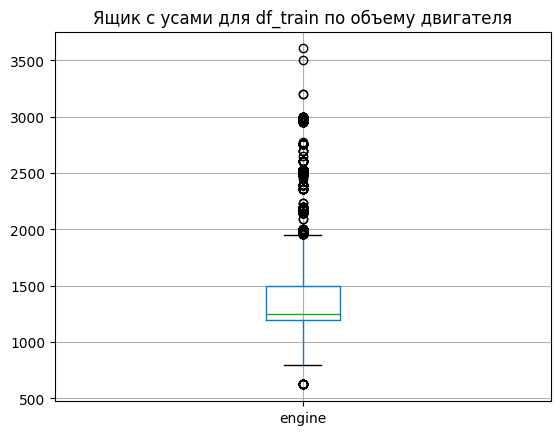

In [69]:
df_train[['engine']].boxplot()
plt.title('Ящик с усами для df_train по объему двигателя')
plt.show()

In [70]:
y_train_out = df_train['selling_price']
X_train_out = df_train.select_dtypes('number').drop(columns=['selling_price'])
y_test = df_test['selling_price']
X_test = df_test.select_dtypes('number').drop(columns=['selling_price'])

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

poly_transformer = PolynomialFeatures(degree = 3)

poly = poly_transformer.fit(X_train_out)

X_train_out = poly_transformer.transform(X_train_out)
X_test = poly_transformer.transform(X_test)

scaler = StandardScaler().fit(X_train_out)

X_train_scaled = scaler.transform(X_train_out)
X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(
    estimator=Lasso(),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 5000.0, 7500.0, 10000.0, 50000.0],
               'positive': [True, False]
    },  
    scoring='r2',
    n_jobs=-1,
    cv=10,
    verbose=1
).fit(X_train_scaled, y_train_out)

pred_train = cv.predict(X_train_scaled)
pred_test = cv.predict(X_test_scaled)

r2_train_cv = r2_score(y_train_out, pred_train)
MSE_train_cv  = MSE(y_train_out, pred_train)

r2_test_cv = r2_score(y_test, pred_test)
MSE_test_cv = MSE(y_test, pred_test)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+14, tolerance: 1.235e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+14, tolerance: 1.463e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e+14, tolerance: 1.434e

In [807]:
print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Train.
MSE = 60987790930.47909
R^2 score = 0.7742767251693242

Test.
MSE = 110152277811.69522
R^2 score = 0.8083736851079841



Удаление выбросов, добавление в модель с вещественными признаками полиномов 3 степени и стандартизация признаков позволили улучшить качество модели c L1-регуляризацией. Теперь $R^2 \approx 0.8084$.

Теперь применю L2-регуляризацию.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

cv = GridSearchCV(
    estimator=Ridge(),
    param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 5000.0, 7500.0, 10000.0, 50000.0]},  
    scoring='r2',
    n_jobs=-1,
    cv=10,
    verbose=1
).fit(X_train_scaled, y_train_out)


r2_train_cv = r2_score(y_train_out, cv.predict(X_train_scaled))
MSE_train_cv  = MSE(y_train_out, cv.predict(X_train_scaled))

r2_test_cv = r2_score(y_test, cv.predict(X_test_scaled))
MSE_test_cv = MSE(y_test, cv.predict(X_test_scaled))

Fitting 10 folds for each of 11 candidates, totalling 110 fits


In [823]:
print(f'Train.\nMSE = {MSE_train_cv}\nR^2 score = {r2_train_cv}\n')
print(f'Test.\nMSE = {MSE_test_cv}\nR^2 score = {r2_test_cv}\n')

Train.
MSE = 42950667086.818436
R^2 score = 0.8410343269843923

Test.
MSE = 69541614888.0074
R^2 score = 0.8790219897639399



Метрики улучшились, теперь $R^2 \approx 0.8790$. Добавление категориальных признаков ранее не дали улучшение в качестве модели, поэтому остановлюсь на этой модели с вещественными признаками, полиномами 3 степени, стандартизацией и L2-регуляризацией.

In [77]:
best_model = cv.best_estimator_
best_model

Ridge(alpha=0.001)

In [78]:
# сохраню лучшую модель, веса, Scaler, OneHotEncoder, PolynomialFeatures
data = {
    'best_model': cv.best_estimator_,
    'coef_model': cv.best_estimator_.coef_,
    'scaler': scaler,
    'poly_transformer': poly,
    'ohe': OH_encoder
}

with open('best_model.pickle', 'wb') as file:
    pickle.dump(data, file)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [84]:
def business_metrics(y_true, y_pred):
    up = y_true * 1.1
    lo = y_true * 0.9
    return ((y_pred >= lo) & (y_pred <= up)).sum() / y_pred.shape[0]


y_best = cv.best_estimator_.predict(X_test_scaled)
business_metrics(y_test, y_best)

0.291

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import pickle


app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


with open("best_model.pickle", "rb") as file:
    data = pickle.load(file)
    model = data['best_model']
    scaler = data['scaler']
    poly_transformer = data['poly_transformer']


def str_column_to_float(str_value):
    '''
     функция переводит str в float
     (удаляет единицы измерения в 'mileage', 'engine', 'max_power')
    '''
    if isinstance(str_value, str):
        try:
            return float(str_value.split()[0])
        except:
            return None
    return str_value


def preprocess_data(df):
    '''
    переводит 'mileage', 'engine', 'max_power' из строки в float
    если есть пропуски в 'mileage', 'engine', 'max_power', 'seats', заменяет их на медиану из трейна
    'engine' и 'seats' переводит в int
    удаляет 'torque', 'name', 'selling_price'
    оставляет только вещественные признаки
    преобразовывает данные согласно согласно сохраненной модели
    '''
    for col in ['mileage', 'engine', 'max_power']:
        df[col] = df[col].apply(str_column_to_float)

    medians = {
        'mileage': 19.37,
        'engine': 1248.0,
        'max_power': 81.86,
        'seats': 5.0
    }

    for col, median in medians.items():
        df[col] = df[col].fillna(median)

    df['engine'] = df['engine'].astype(int)
    df['seats'] = df['seats'].astype(int)
    df = df.drop(columns=['torque', 'name', 'selling_price'])
    df = df.select_dtypes('number')
    df_poly = poly_transformer.transform(df)
    df_scaled = scaler.transform(df_poly)
    return df_scaled


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    df_pr = preprocess_data(pd.DataFrame([item.model_dump()]))
    return model.predict(df_pr)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    df = pd.DataFrame([item.model_dump() for item in items])
    df_pr = preprocess_data(df)
    return model.predict(df_pr)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link